In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()
# reflect the tables


['measurement', 'station']

In [7]:
# View all of the classes that automap found


In [8]:
# Save references to each table
measure = Base.classes.measurement
stations = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)
inspector.get_table_names()
conn = engine.connect()

In [11]:
query = """
        SELECT
            *
        FROM
            measurement;
        """

df = pd.read_sql(query, conn)

df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [12]:
query2 = """
        SELECT
            *
        FROM
            station;
        """

df2 = pd.read_sql(query2, conn)

df2.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [13]:
query_comb = """
            Select 
                m.id, m.station, m.date, m.prcp, m.tobs, s.name,
                s.latitude, s.longitude, s.elevation
            From
                measurement as m
                join station as s on m.station=s.station;
            """

df_comb = pd.read_sql(query_comb, conn)
df_comb.head()

,id,station,date,prcp,tobs,name,latitude,longitude,elevation
0,1,USC00519397,2010-01-01,0.08,65.0,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00519397,2010-01-02,0.00,63.0,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,3,USC00519397,2010-01-03,0.00,74.0,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,4,USC00519397,2010-01-04,0.00,76.0,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,5,USC00519397,2010-01-06,NaN,73.0,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


In [14]:
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         19550 non-null  int64  
 1   station    19550 non-null  object 
 2   date       19550 non-null  object 
 3   prcp       18103 non-null  float64
 4   tobs       19550 non-null  float64
 5   name       19550 non-null  object 
 6   latitude   19550 non-null  float64
 7   longitude  19550 non-null  float64
 8   elevation  19550 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.
query_max = """
            Select 
                max(date)
            From
                measurement;
            """
engine.execute(query_max).fetchall()

[('2017-08-23',)]

In [35]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
query_year = """
            Select
                date, station, prcp
            From
                measurement
            Where
                date >= '2016-08-23'
            """

# Save the query results as a Pandas DataFrame and set the index to the date column
df_year = pd.read_sql(query_year, conn)
df_year = df_year.sort_values(by=['date'], ascending=True).reset_index()
df_year.head(10)
# Sort the dataframe by date
df_year.drop(['index'], axis=1)

# Use Pandas Plotting with Matplotlib to plot the data




,date,station,prcp
0,2016-08-23,USC00519397,0.00
1,2016-08-23,USC00517948,NaN
2,2016-08-23,USC00519281,1.79
3,2016-08-23,USC00514830,0.05
4,2016-08-23,USC00513117,0.15
...,...,...,...
2225,2017-08-22,USC00519523,0.00
2226,2017-08-23,USC00514830,0.00
2227,2017-08-23,USC00519397,0.00
2228,2017-08-23,USC00519523,0.08


In [21]:
df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    2230 non-null   int64  
 1   id       2230 non-null   int64  
 2   station  2230 non-null   object 
 3   date     2230 non-null   object 
 4   prcp     2021 non-null   float64
 5   tobs     2230 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 104.7+ KB


In [22]:
df_year['date'] = pd.to_datetime(df_year['date'])
df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   index    2230 non-null   int64         
 1   id       2230 non-null   int64         
 2   station  2230 non-null   object        
 3   date     2230 non-null   datetime64[ns]
 4   prcp     2021 non-null   float64       
 5   tobs     2230 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 104.7+ KB


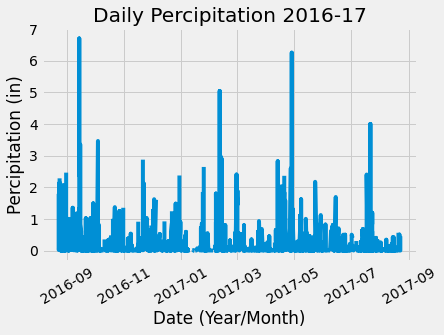

In [33]:
plt.plot(df_year["date"], df_year["prcp"])
plt.xticks(rotation=30)
plt.title("Daily Percipitation 2016-17")
plt.xlabel("Date (Year/Month)")
plt.ylabel("Percipitation (in)")
plt.show()

In [24]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_year.describe()

,index,id,prcp,tobs
count,2230.000000,2230.000000,2021.000000,2230.000000
mean,1114.500000,10158.570404,0.177279,74.590583
std,643.889872,5603.500203,0.461190,4.611667
min,0.000000,2364.000000,0.000000,58.000000
25%,557.250000,5287.250000,0.000000,72.000000
50%,1114.500000,8930.500000,0.020000,75.000000
75%,1671.750000,14750.750000,0.130000,78.000000
max,2229.000000,19550.000000,6.700000,87.000000


# Exploratory Station Analysis

In [25]:
df2

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [26]:
# Design a query to calculate the total number stations in the dataset
query3 = """
        Select 
            Count(Distinct station) as no_stations
        From 
            station;
        """

df_total = pd.read_sql(query3, conn)

df_total

,no_stations
0,9


In [27]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
query4= """
        Select 
            station, count(station) as rows
        from 
            measurement
        group by 
            station
        order by rows desc, station
        """

df_rides = pd.read_sql(query4, conn)
df_rides

,station,rows
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [28]:
queryp = """
        select 
            station, min(tobs) as min_temp,
            avg(tobs) as avg_temp, max(tobs) as max_temp
        from 
            measurement
        where
            station = 'USC00519281';
        """

df_pop = pd.read_sql(queryp, conn)
df_pop

,station,min_temp,avg_temp,max_temp
0,USC00519281,54.0,71.663781,85.0


In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_max = session.query(measure.station, func.max(measure.tobs), func.min(measure.tobs), func.avg(measure.tobs)).\
    filter(measure.station == 'USC00519281').all()
station_max

[('USC00519281', 85.0, 54.0, 71.66378066378067)]

In [30]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
queryt = """
        Select
            date, station, tobs
        From
            measurement
        where
            date >= '2016-08-23'
            And station = 'USC00519281';
        """

df_hist = pd.read_sql(queryt, conn)
print(df_hist.info())
df_hist.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     352 non-null    object 
 1   station  352 non-null    object 
 2   tobs     352 non-null    float64
dtypes: float64(1), object(2)
memory usage: 8.4+ KB
None


,date,station,tobs
0,2016-08-23,USC00519281,77.0
1,2016-08-24,USC00519281,77.0
2,2016-08-25,USC00519281,80.0
3,2016-08-26,USC00519281,80.0
4,2016-08-27,USC00519281,75.0


In [31]:
df_hist['date'] = pd.to_datetime(df_hist['date'])
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     352 non-null    datetime64[ns]
 1   station  352 non-null    object        
 2   tobs     352 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 8.4+ KB


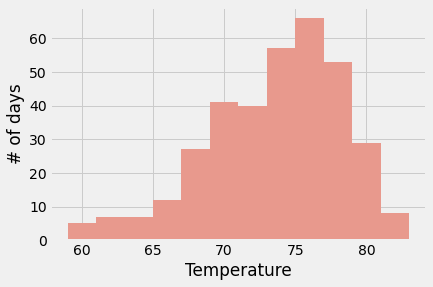

In [32]:
plt.hist(df_hist.tobs, bins=12, color="#E8998D")
plt.ylabel('# of days')
plt.xlabel('Temperature')
plt.show()

In [ ]:
# Flask Query Setup

In [38]:
query_prcp = """
            Select
                date, prcp
            From
                measurement
            Order By
                date asc;
            """

df_prcp = pd.read_sql(query_prcp, conn)
df_prcp

,date,prcp
0,2010-01-01,0.08
1,2010-01-01,0.28
2,2010-01-01,0.21
3,2010-01-01,0.15
4,2010-01-01,0.15
...,...,...
19545,2017-08-22,0.50
19546,2017-08-23,0.00
19547,2017-08-23,0.00
19548,2017-08-23,0.08


In [39]:
query_st = """
            Select Distinct
                station
            From
                station;
            """

df_st = pd.read_sql(query_st, conn)
df_st

,station
0,USC00519397
1,USC00513117
2,USC00514830
3,USC00517948
4,USC00518838
5,USC00519523
6,USC00519281
7,USC00511918
8,USC00516128


In [40]:
query_1st = """
        Select
            date, station, tobs
        From
            measurement
        where
            date >= '2016-08-23'
            And station = 'USC00519281';
        """

df_1st = pd.read_sql(query_1st, conn)

df_1st.head()

,date,station,tobs
0,2016-08-23,USC00519281,77.0
1,2016-08-24,USC00519281,77.0
2,2016-08-25,USC00519281,80.0
3,2016-08-26,USC00519281,80.0
4,2016-08-27,USC00519281,75.0


In [41]:
query_max = """
            Select 
                max(tobs), min(tobs), avg(tobs)
            From 
                measurement
            Where
                date >= '2010-01-01';
            """

df_temp = pd.read_sql(query_max, conn)
df_temp

,max(tobs),min(tobs),avg(tobs)
0,87.0,53.0,73.097954


In [42]:
query_2010 = """
            Select 
                max(tobs), min(tobs), avg(tobs)
            From 
                measurement
            Where
                date >= '2010-01-01'
                And date <= '2011-01-01';
            """

df_2010 = pd.read_sql(query_2010, conn)
df_2010

,max(tobs),min(tobs),avg(tobs)
0,87.0,56.0,72.494805


# Close session